In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [70]:
# 1. Load the California Housing Dataset
load_dataset = pd.read_csv('train.csv')
load_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
# 1. Load the California Housing Dataset
load_dataset = pd.read_csv('train.csv')

#handle missing values and featuers enginering 
load_dataset['LotFrontage'] = load_dataset['LotFrontage'].fillna(load_dataset['LotFrontage'].median())
none_cols = ['Alley', 'FireplaceQu', 'Fence']
for col in none_cols:
    load_dataset[col] = load_dataset[col].fillna('None')

load_dataset= load_dataset.drop(columns=['Id', 'PoolQC', 'MiscFeature'])
load_dataset = load_dataset.dropna()

In [72]:
# create bathroom feature
load_dataset['TotalBathrooms'] = load_dataset['FullBath'] + 0.5*load_dataset['HalfBath']

#sellect features
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']
X = load_dataset[features]
y = load_dataset['SalePrice']


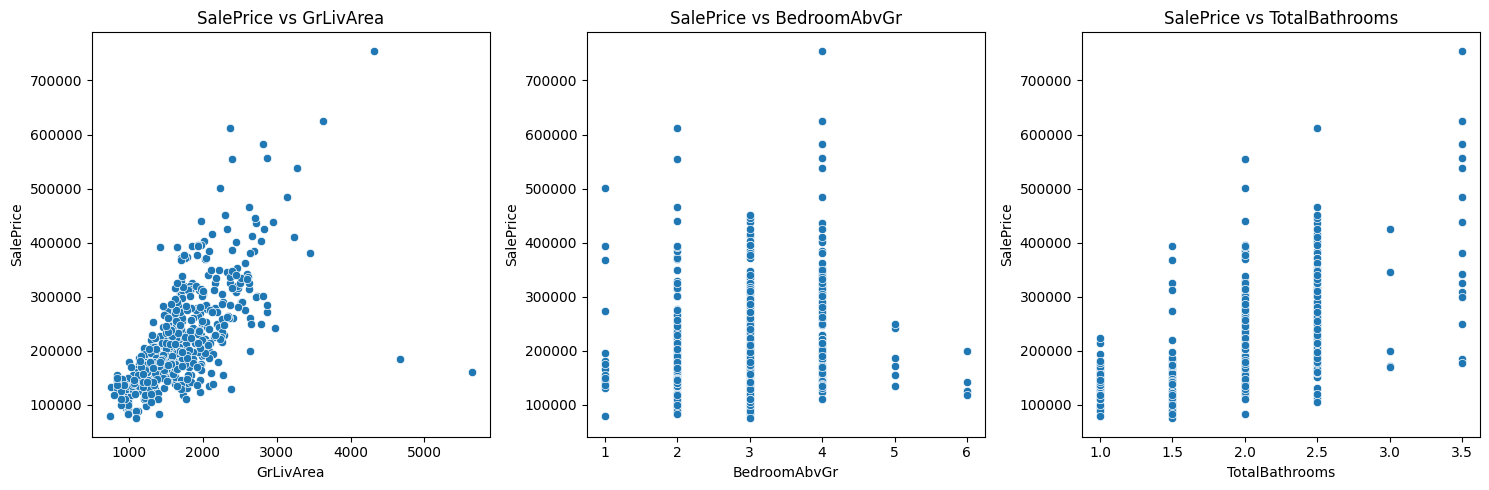

In [73]:
# Cell 4: Exploratory Data Analysis (EDA)
# Visualize relationships between features and target
plt.figure(figsize=(15,5))
for i, col in  enumerate(features,1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=col, y='SalePrice', data=load_dataset)
    plt.title(f'SalePrice vs {col}')

plt.tight_layout()
plt.show()

In [74]:
# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
from sklearn.metrics import mean_absolute_error

# Evaluate Models
y_pred = model.predict(X_test)

# Regression metrics
print('Regression Metrics:')
print(f'RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}')
print(f'MAE: ${mean_absolute_error(y_test, y_pred):,.2f}')
print(f'R2 Score: {r2_score(y_test, y_pred):.4f}')

Regression Metrics:
RMSE: $69,882.14
MAE: $44,115.41
R2 Score: 0.4647


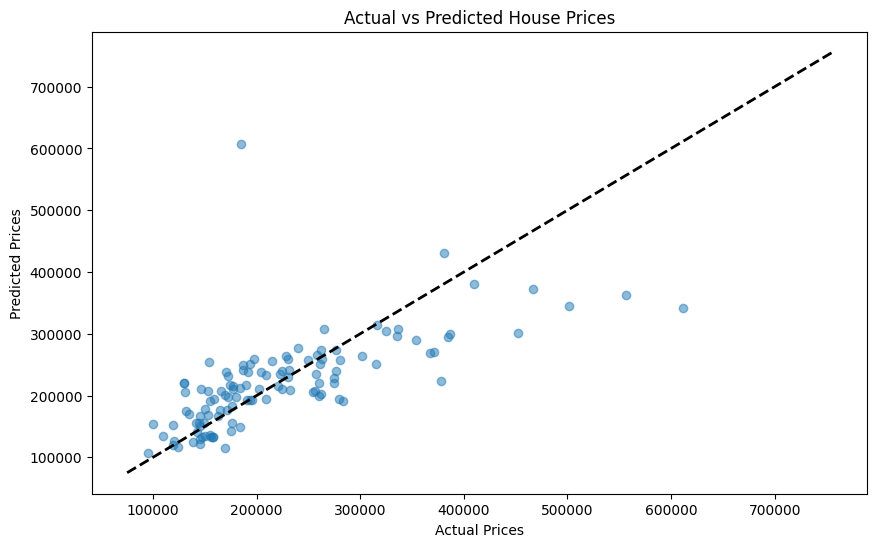

In [76]:
#Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [78]:

# Cell 5: Prediction function with input handling
def predict_price():
    try:
        sqft = float(input("Enter square footage (GrLivArea): "))
        bedrooms = int(input("Enter number of bedrooms (BedroomAbvGr): "))
        full_bath = int(input("Enter number of full bathrooms: "))
        half_bath = int(input("Enter number of half bathrooms: "))
        
        total_bath = full_bath + 0.5 * half_bath
        
        features = np.array([[sqft, bedrooms, total_bath]])
        prediction = model.predict(features)
        
        print(f"\nPredicted House Price: ${prediction[0]:,.2f}")
    except ValueError:
        print("Invalid input! Please enter numeric values.")

# Cell 6: Run prediction loop
while True:
    predict_price()
    continue_pred = input("\nWould you like to make another prediction? (y/n): ").lower()
    if continue_pred != 'y':
        break

c:\Users\ajmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicted House Price: $207,510.01
